<a href="https://colab.research.google.com/github/waizwafiq/BBR-ContinAuth/blob/main/train_BBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as pproc
import seaborn as sns

In [86]:
#from google.colab import files
#uploaded = files.upload()

In [87]:
df = pd.read_csv('dataset_genuine.csv')

In [88]:
#IRRELEVANT FEATURES TO REMOVE
del df['t']
del df['ttc']
del df['paused_time']
del df['x']
del df['y']
del df['s_euclid_c']
del df['pauses']
df.head(4)

,paused_time_ratio,dx,dy,ds,theta,c,c_roc,v_x,v_y,v,a,j,w,straightness,jitter
0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
1,0.000000,0,-1,1.000000,1.570796,1.570796,1.570796,0.000000,-62.159676,62.159676,3863.825292,2.401741e+05,97.640190,1.000000,0.000000
2,0.952964,-19,-6,19.924859,0.305879,-0.063484,-0.082022,-1187.299643,-374.936729,1245.093568,73920.894131,4.377828e+06,-79.044002,0.967675,20.924859
3,0.910714,-31,-9,32.280025,0.282555,-0.000723,0.001944,-1964.051522,-570.208506,2045.149413,50688.738653,-1.471908e+06,-1.477722,0.986707,2.542664


In [89]:
X = df
X.head(3)

,paused_time_ratio,dx,dy,ds,theta,c,c_roc,v_x,v_y,v,a,j,w,straightness,jitter
0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
1,0.000000,0,-1,1.000000,1.570796,1.570796,1.570796,0.000000,-62.159676,62.159676,3863.825292,2.401741e+05,97.640190,1.000000,0.000000
2,0.952964,-19,-6,19.924859,0.305879,-0.063484,-0.082022,-1187.299643,-374.936729,1245.093568,73920.894131,4.377828e+06,-79.044002,0.967675,20.924859


## **DATA SCALING AND PCA**

In [90]:
scaler = pproc.MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
X_PCA = pd.DataFrame(data = principalComponents, 
                           columns = ['PC1', 'PC2'])
X_PCA.head(3)

,PC1,PC2
0,0.137316,1.216926
1,-0.431783,1.293017
2,0.040953,0.747585


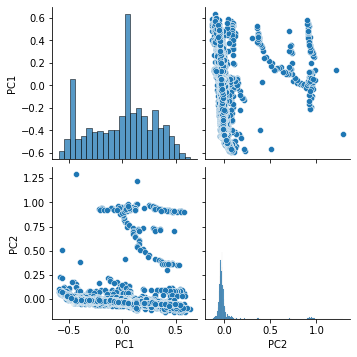

In [92]:
sns.pairplot(X_PCA)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, _, _ = train_test_split(X_PCA , X_PCA, shuffle = True, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(X_PCA.shape)

(3038, 2)
(1303, 2)
(4341, 2)


## **ONE-CLASS CLASSIFICATION MODEL BUILDING**

In [94]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
import matplotlib.pyplot as plt

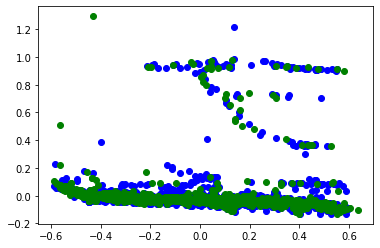

In [95]:
plt.scatter(X_train.values[:,0], X_train.values[:,1], color='b')
plt.scatter(X_test.values[:,0], X_test.values[:,1], color='g')
plt.show()

In [106]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)

training time

In [107]:
pred = svm.fit_predict(X_train)
scores = svm.score_samples(X_train)
print(pred, scores)

[1 1 1 ... 1 1 1] [151.78455653 151.77995195 151.81512283 ... 151.78296174 151.81745339
 151.81124428]


In [108]:
thresh = quantile(scores, 0.03)
print(thresh)

151.77587212600685


In [109]:
index = where(scores <= thresh)
values = X_train.values[index] #get the data (anomalies) where scores <= thresh 

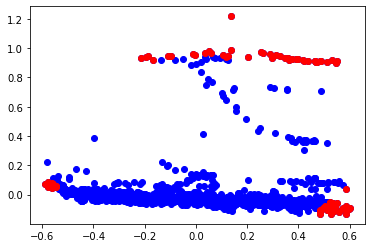

In [110]:
plt.scatter(X_train.values[:,0], X_train.values[:,1], color='b')
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

In [111]:
print(len(values), "anomalies of", len(X_train.values))

92 anomalies of 3038


testing time

In [112]:
svm.predict(X_test)
scores_test = svm.score_samples(X_test)

In [113]:
index = where(scores_test <= thresh)
values_test = X_test.values[index]

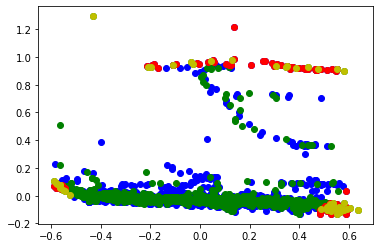

In [114]:
plt.scatter(X_train.values[:,0], X_train.values[:,1], color='b')
plt.scatter(X_test.values[:,0], X_test.values[:,1], color='g')
plt.scatter(values[:,0], values[:,1], color='r')
plt.scatter(values_test[:,0], values_test[:,1], color='y')
plt.show()

In [116]:
print("True probability = ",1-(len(values_test)+len(values)) / len(X_PCA))

True probability =  0.9682100898410504
